In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import os
import pandas as pd
import warnings

In [111]:
name = 'NLDISALA0089_1_frame160_046'

prob_map = np.load(r'Z:\grodriguez\CardiacOCT\preds-test-set\predicted_results_model4_2d_with_maps\{}.npz'.format(name))
pred_seg = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\preds-test-set\predicted_results_model4_2d_with_maps\{}.nii.gz'.format(name))
pred_seg_data = sitk.GetArrayFromImage(pred_seg)
true_seg = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task504_CardiacOCT\labelsTs\{}.nii.gz'.format(name))
true_seg_data = sitk.GetArrayFromImage(true_seg)
true_img = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task504_CardiacOCT\imagesTs\{}_0000.nii.gz'.format(name))
true_img_data = sitk.GetArrayFromImage(true_img)

In [112]:
num_classes = 13
probs_list = []

for i in prob_map.items():

    for label in range(num_classes):
        probs_list.append(i[1][label][0])

prob_img = np.zeros((num_classes, 691, 691))
_, rows, cols = prob_img.shape

for i in range(rows):
    for j in range(cols):

        prob_img[:, i, j] = np.array([probs_list[label][i, j] for label in range(num_classes)])


In [113]:
prob_img_max = np.max(prob_img, axis=0)

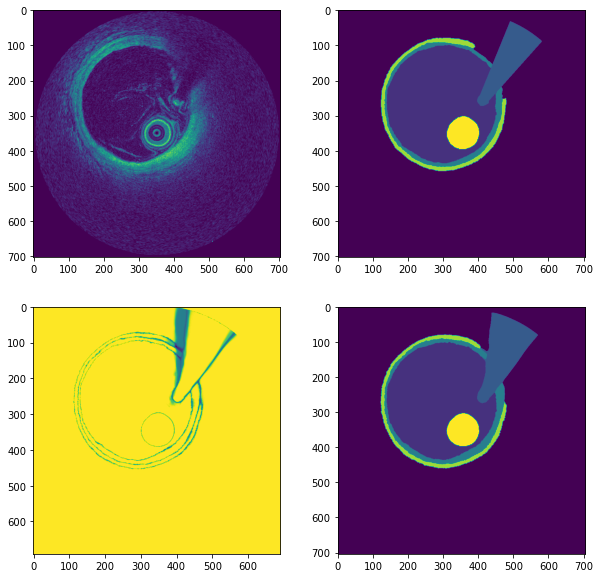

In [114]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

axes = axes.flatten()

axes[0].imshow(true_img_data[0])
axes[1].imshow(true_seg_data[0])
axes[2].imshow(prob_img_max)
axes[3].imshow(pred_seg_data[0])

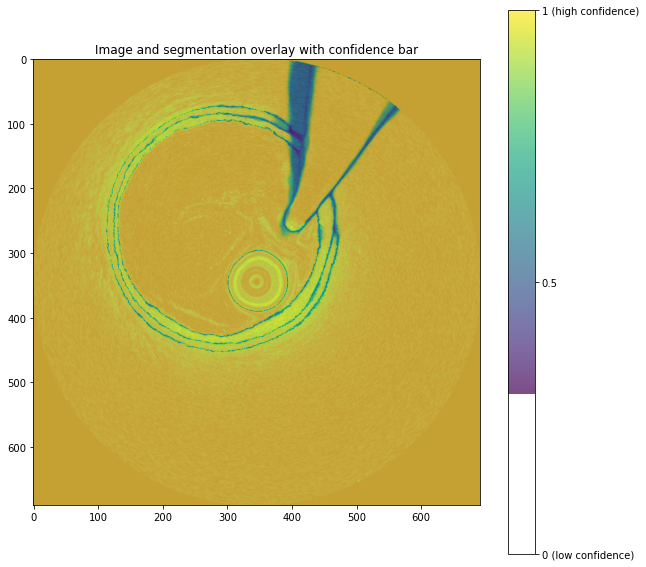

In [115]:
#Create a colormap for the segmentation overlay
cmap = plt.cm.get_cmap("viridis")

# Create the overlay plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(true_img_data[0][6:697, 6:697])
overlay = ax.imshow(prob_img_max, cmap=cmap, alpha=0.7)
cbar = fig.colorbar(overlay, ax=ax, orientation="vertical")

#Set the colorbar limits and ticks
cbar.set_ticks([0, 0.5, 1])
cbar.set_ticklabels(["0 (low confidence)", "0.5", "1 (high confidence)"])

#Set the plot title and axis labels
ax.set_title("Image and segmentation overlay with confidence bar")

#Show the plot
plt.show()